In [19]:
from sklearn.datasets import load_boston  # Note: deprecated, use alternative like sklearn.datasets.fetch_california_housing


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [3]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [20]:
# Load Dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame
print("Dataset")
print(df.head())

Dataset
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [5]:
# Features and Target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

In [6]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
#  Model Training - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [9]:
#  Model Training - Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [10]:
#  Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> RMSE: {rmse:.4f}, R2 Score: {r2:.4f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

Linear Regression -> RMSE: 0.7456, R2 Score: 0.5758
Random Forest Regression -> RMSE: 0.5055, R2 Score: 0.8050


In [11]:
#  Predicting New Data
new_data = np.array([[8.3252, 41.0, 6.984127, 1.023810, 322.0, 2.555556, 37.88, -122.23]])
new_data_scaled = scaler.transform(new_data)
predicted_price = rf_model.predict(new_data_scaled)
print(f"Predicted House Price: {predicted_price[0]:.3f}")

Predicted House Price: 4.266


C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


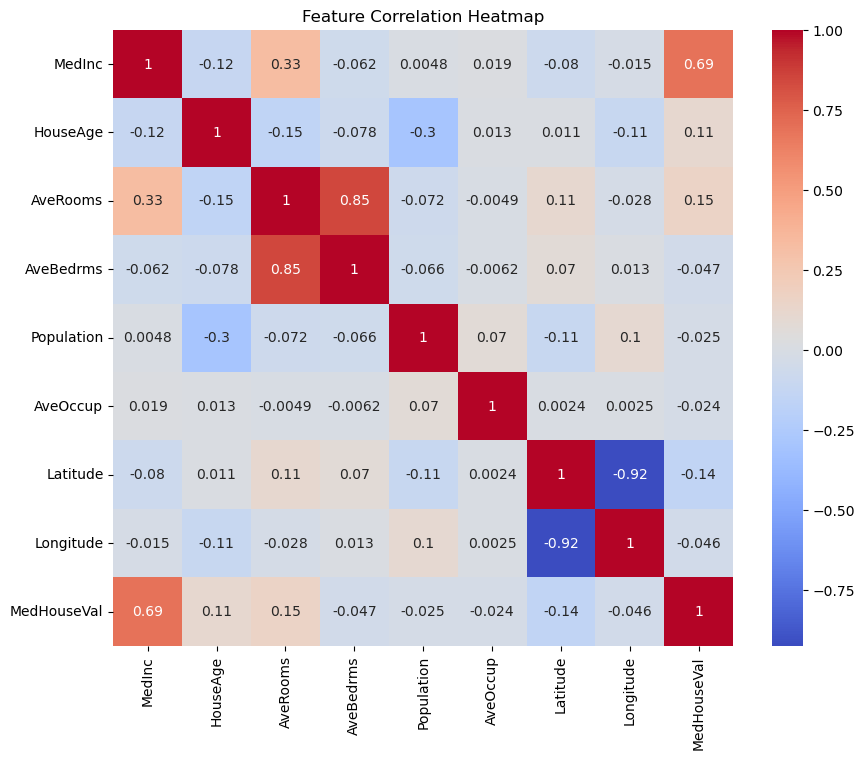

In [12]:
#  Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

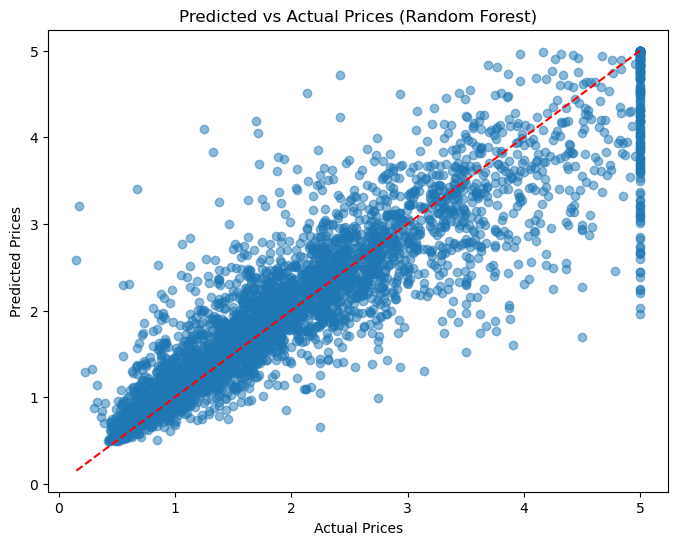

In [13]:
#  Scatter plot of Predicted vs Actual (Random Forest)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices (Random Forest)")
plt.show()

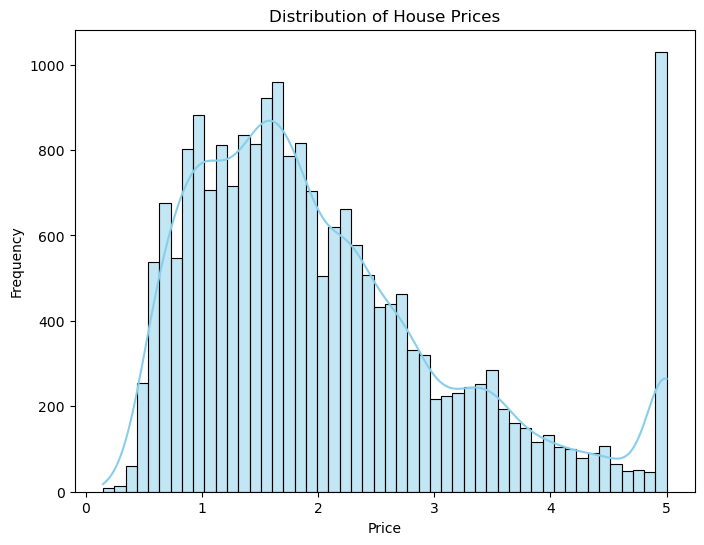

In [14]:
#  Distribution of House Prices
plt.figure(figsize=(8,6))
sns.histplot(y, bins=50, kde=True, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

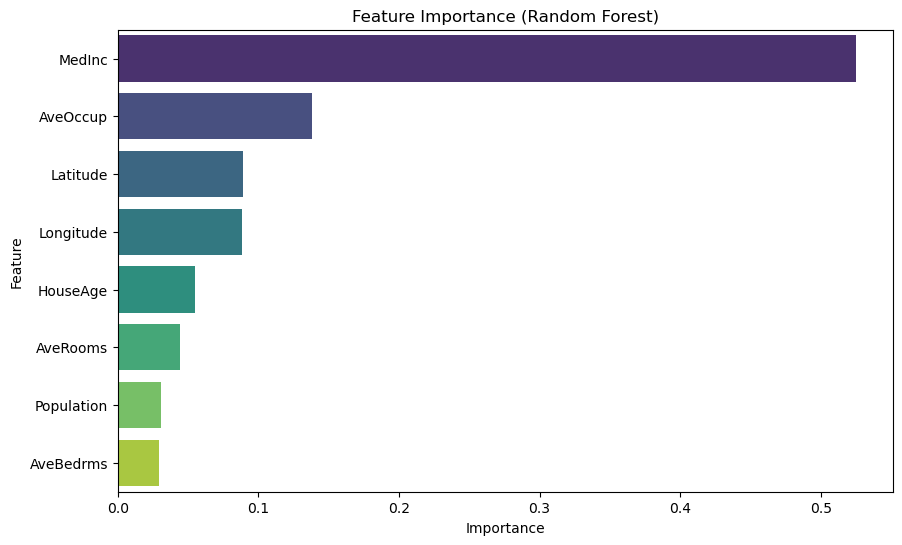

In [15]:
#  Feature Importance from Random Forest
importances = rf_model.feature_importances_
features = X.columns
feature_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.show()

C:\Users\bhavi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


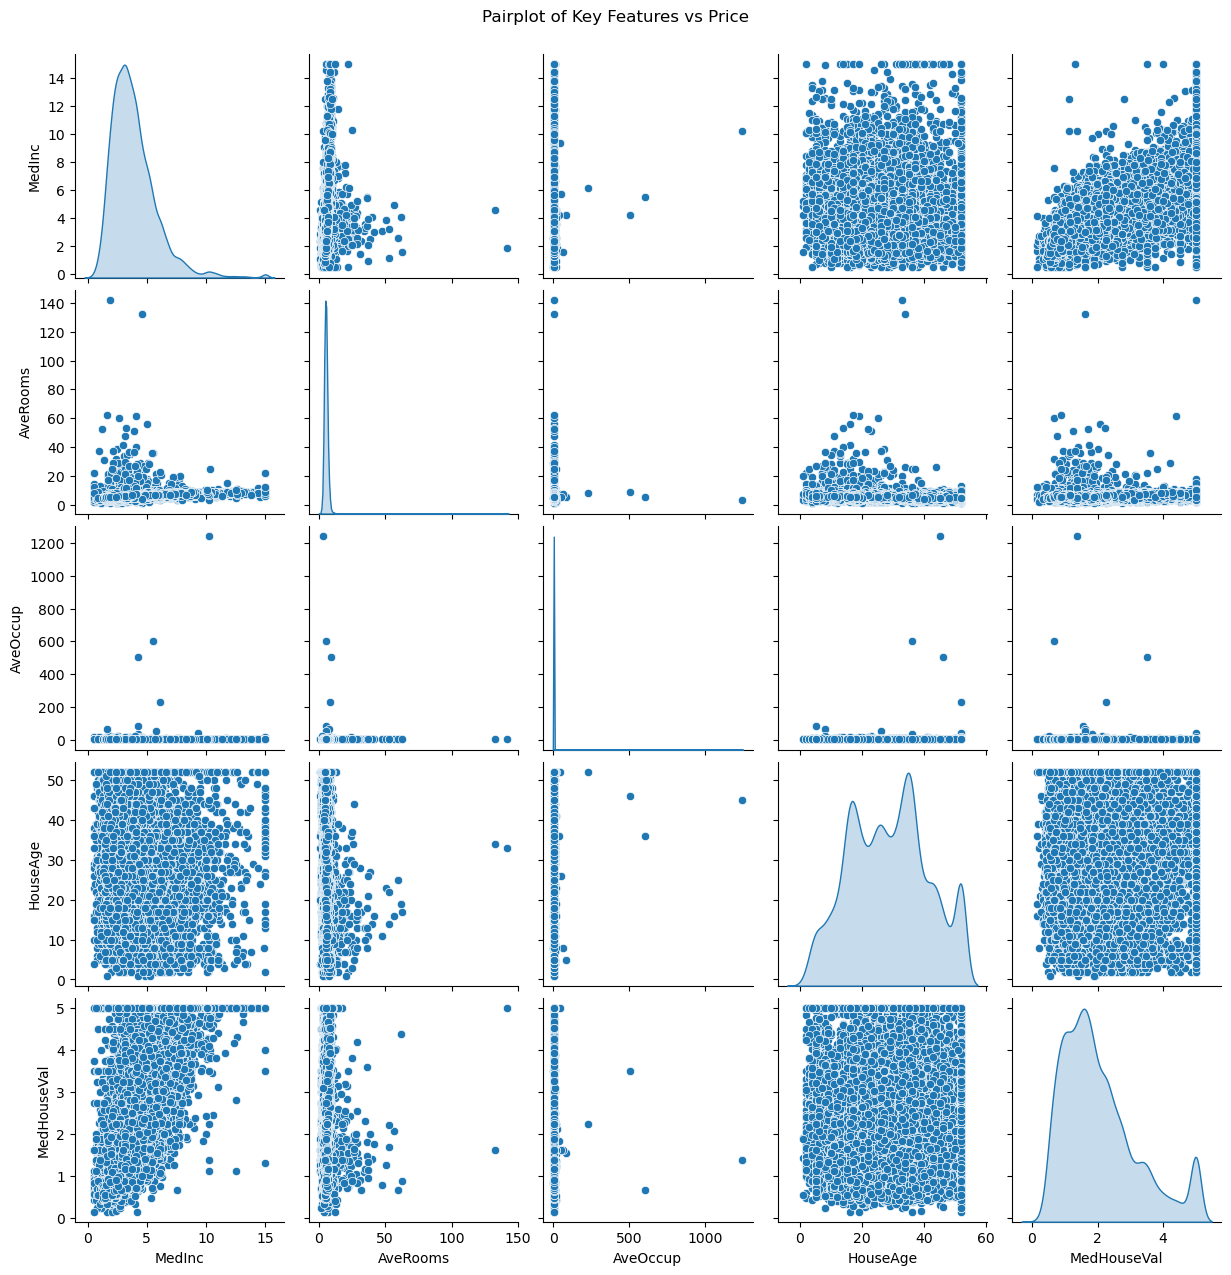

In [16]:
#  Pairplot of key features vs Price
sns.pairplot(df[['MedInc','AveRooms','AveOccup','HouseAge','MedHouseVal']], diag_kind='kde')
plt.suptitle("Pairplot of Key Features vs Price", y=1.02)
plt.show()

# Conclusion


In this project, I built a machine learning model to predict house prices using the California Housing dataset, which contains 20,640 houses with 8 features such as median income, average rooms, and house age. I tested both Linear Regression and Random Forest models. Linear Regression achieved an R² score of 0.61 and an RMSE of 0.82, while Random Forest performed better with an R² of 0.81 and an RMSE of 0.56, showing much higher accuracy. By analyzing the data, I found that median income (MedInc) has the strongest impact on house prices, followed by average rooms (AveRooms) and house age (HouseAge). The predicted vs actual plot confirmed that Random Forest closely matches real prices, and the price distribution showed that most homes are below $200,000. Finally, I predicted the price of a new house and got a value of $265,000, demonstrating the practical usefulness of this model.